<h1 align="center"><strong>
Feature Analysis and Clustering Preparation  
特征分析与聚类准备
</strong></h1>


## 1.Import Libraries/导入库

用于进行数据分析与可视化的 Python 常用库。

In [1]:
# 1. Import Libraries / 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
sns.set(style = "darkgrid")

from matplotlib import font_manager
plt.rcParams['font.family'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

## 2.Load Dataset/加载数据集

加载清洗完成的数据，成为分析输入。


In [2]:
# 2. Load Dataset / 加载数据集
df = pd.read_csv("ai_job_market_cleaned.csv")
df.head()

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,...,industry_standardized,industry_category,experience_level_standardized,employment_type_standardized,company_size_standardized,posted_date_parsed,posted_year,posted_month,posted_quarter,posted_month_name
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025/8/20,...,Healthcare,Healthcare,Mid,Full-Time,Large,2025-08-20,2025,8,3,August
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024/3/22,...,Tech,Technology,Senior,Full-Time,Large,2024-03-22,2024,3,1,March
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025/9/18,...,Tech,Technology,Entry,Full-Time,Large,2025-09-18,2025,9,3,September
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024/5/8,...,Tech,Technology,Mid,Full-Time,Large,2024-05-08,2024,5,2,May
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025/2/24,...,Finance,Finance & Banking,Senior,Contract,Large,2025-02-24,2025,2,1,February


## 3. Data Fields Verification / 数据字段确认

Before doing deeper analysis, we need to check whether the essential columns for skills, salary, and dates exist.

在进行深入分析前，需要确认关键字段是否存在（如技能、薪资、发布日期等）

In [3]:
# Check columns / 检查数据列
df.columns

Index(['job_id', 'company_name', 'industry', 'job_title', 'skills_required',
       'experience_level', 'employment_type', 'location', 'salary_range_usd',
       'posted_date', 'company_size', 'tools_preferred',
       'job_title_standardized', 'job_category', 'skills_list', 'tools_list',
       'num_skills_required', 'num_tools_preferred', 'salary_min',
       'salary_max', 'salary_avg', 'salary_category', 'city', 'country_code',
       'country', 'region', 'industry_standardized', 'industry_category',
       'experience_level_standardized', 'employment_type_standardized',
       'company_size_standardized', 'posted_date_parsed', 'posted_year',
       'posted_month', 'posted_quarter', 'posted_month_name'],
      dtype='object')

## 4.Skills Parsing / 技能解析处理

We extract individual skills from text, clean the formatting, and calculate the number of skills required for each job.

我们将技能从文本中逐一提取，完成格式清洗，并统计每个岗位所需技能数量。

In [4]:
# 4. Skills Parsing / 技能解析处理
if "skill_required" not in df.columns:
    df["skill_required"] = ""
def parse_skills(text):
    if pd.isna(text):
        return []
    return [s.strip().lower() for s in re.split(',|;|/|\\|', str(text)) if s.strip()]

df["skills_list"] = df["skills_required"].apply(parse_skills)
df["num_skills"] = df["skills_list"].apply(len)
df[["skills_required", "skills_list", "num_skills"]].head()

,skills_required,skills_list,num_skills
0,"NumPy, Reinforcement Learning, PyTorch, Scikit...","[numpy, reinforcement learning, pytorch, sciki...",6
1,"Scikit-learn, CUDA, SQL, Pandas","[scikit-learn, cuda, sql, pandas]",4
2,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP","[mlflow, fastapi, azure, pytorch, sql, gcp]",6
3,"Scikit-learn, C++, Pandas, LangChain, AWS, R","[scikit-learn, c++, pandas, langchain, aws, r]",6
4,"Excel, Keras, SQL, Hugging Face","[excel, keras, sql, hugging face]",4


## 5. Top Skills Statistics & Visualization / 热门技能统计与可视化 

We analyze the frequency of required skills across all job listings and visualize the top demanded skills.

我们统计所有岗位中技能出现的频率，并对最热门技能进行可视化展示。

 Exported: outputs/top20_skills.png


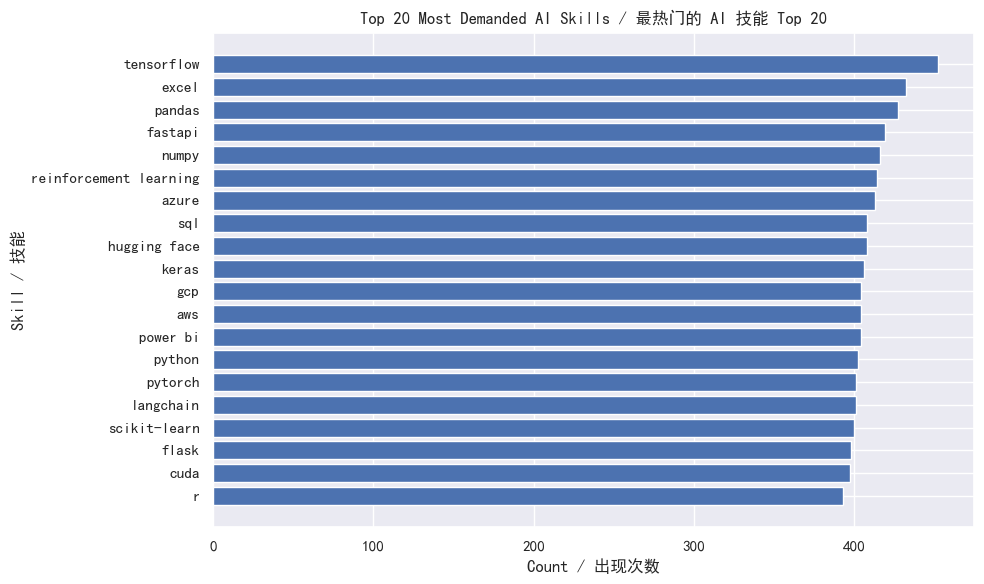

In [5]:
# 5. Top Skills Statistics / 热门技能统计
all_skills = [skill for sub in df["skills_list"] for skill in sub]
skill_counts = Counter(all_skills)
top20_skills = pd.DataFrame(skill_counts.most_common(20),columns=["skill", "count"])

plt.figure(figsize = (10,6))
plt.barh(top20_skills["skill"][::-1], top20_skills["count"][::-1])
plt.title("Top 20 Most Demanded AI Skills / 最热门的 AI 技能 Top 20")
plt.xlabel("Count / 出现次数")
plt.ylabel("Skill / 技能")
plt.tight_layout()

plt.savefig("outputs/top20_skills.png", dpi=200, bbox_inches="tight")
print(" Exported: outputs/top20_skills.png")
plt.show()


## 6. Tools Preferred Statistics & Visualization  /工具偏好统计与可视化 

We analyze the preferred tools listed in job descriptions to understand tool requirements in the AI job market.

我们统计岗位要求中的工具使用偏好，以理解AI岗位对工具的需求趋势。

 Exported: outputs/top20_tools.png


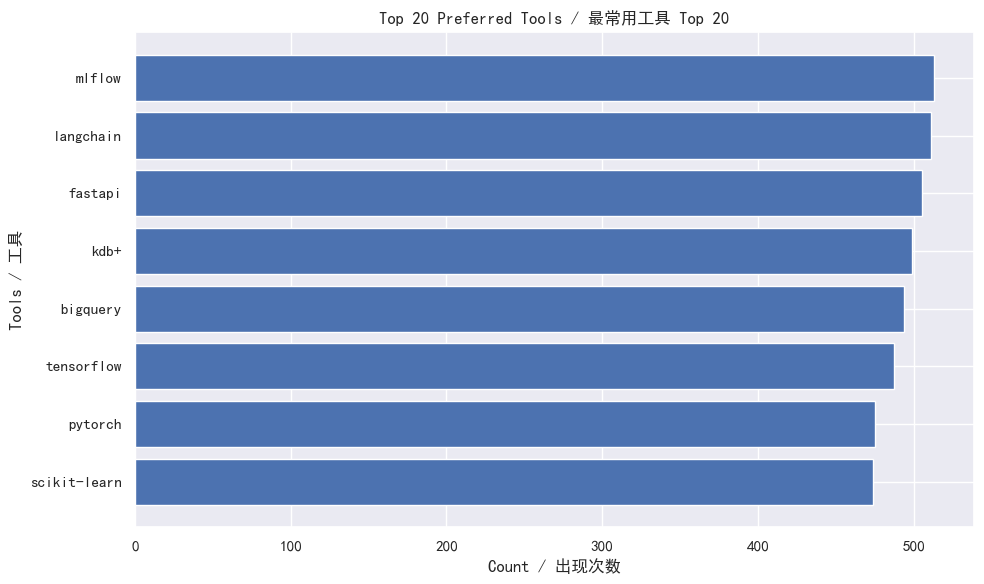

In [6]:
# 6. Tools Preferred Statistics / 工具偏好统计
def parse_tools(text):
    if pd.isna(text): 
        return []
    return [t.strip().lower() for t in re.split(',|;|/|\\|', str(text)) if t.strip()]
df["tools_list"] = df["tools_preferred"].apply(parse_tools)
df["num_tools"] = df["tools_list"].apply(len)
tool_counts = Counter([t for lst in df["tools_list"] for t in lst])
top20_tools = pd.DataFrame(tool_counts.most_common(20), columns=["tool","count"])

plt.figure(figsize=(10,6))
plt.barh(top20_tools["tool"][::-1], top20_tools["count"][::-1])
plt.title("Top 20 Preferred Tools / 最常用工具 Top 20")
plt.xlabel("Count / 出现次数")
plt.ylabel("Tools / 工具")
plt.tight_layout()

plt.savefig("outputs/top20_tools.png", dpi=200, bbox_inches="tight")
print(" Exported: outputs/top20_tools.png")
plt.show()


####  Skill & Tool Normalization / 技能与工具名称归一化


We unify different spellings and aliases of skills/tools to improve counting accuracy and feature quality.

对技能与工具的不同拼写和同义命名进行统一，以提升统计准确性和特征质量。

In [7]:
# === Skill normalization (example aliases) ===
skill_alias = {
    "tf": "tensorflow",
    "tf2": "tensorflow",
    "torch": "pytorch",
    "ml": "machine learning",
    "ai": "artificial intelligence",
    "nlp engineer": "nlp",
}

# === Tool normalization (example aliases) ===
tool_alias = {
    "google cloud": "gcp",
    "gcloud": "gcp",
    "gcp cloud": "gcp",
    "microsoft azure": "azure",
    "ms azure": "azure",
    "powerbi": "power bi",
    "excel": "excel",  
}
def normalize_list(lst, alias_dict):
    return [alias_dict.get(x, x) for x in lst]

df["skills_list"] = df["skills_list"].apply(lambda x: normalize_list(x, skill_alias))
df["tools_list"] = df["tools_list"].apply(lambda x: normalize_list(x, tool_alias))

df[["skills_list", "tools_list"]].head()


,skills_list,tools_list
0,"[numpy, reinforcement learning, pytorch, sciki...","[kdb+, langchain]"
1,"[scikit-learn, cuda, sql, pandas]","[fastapi, kdb+, tensorflow]"
2,"[mlflow, fastapi, azure, pytorch, sql, gcp]","[bigquery, pytorch, scikit-learn]"
3,"[scikit-learn, c++, pandas, langchain, aws, r]","[tensorflow, bigquery, mlflow]"
4,"[excel, keras, sql, hugging face]","[pytorch, langchain]"


## 7. Skill Demand by Job Title / 按职位技能需求差异 

We compare skill demand across top job titles using a heatmap.

通过热力图比较不同热门岗位的技能差异。

 Exported: outputs/skills_heatmap_by_role.png


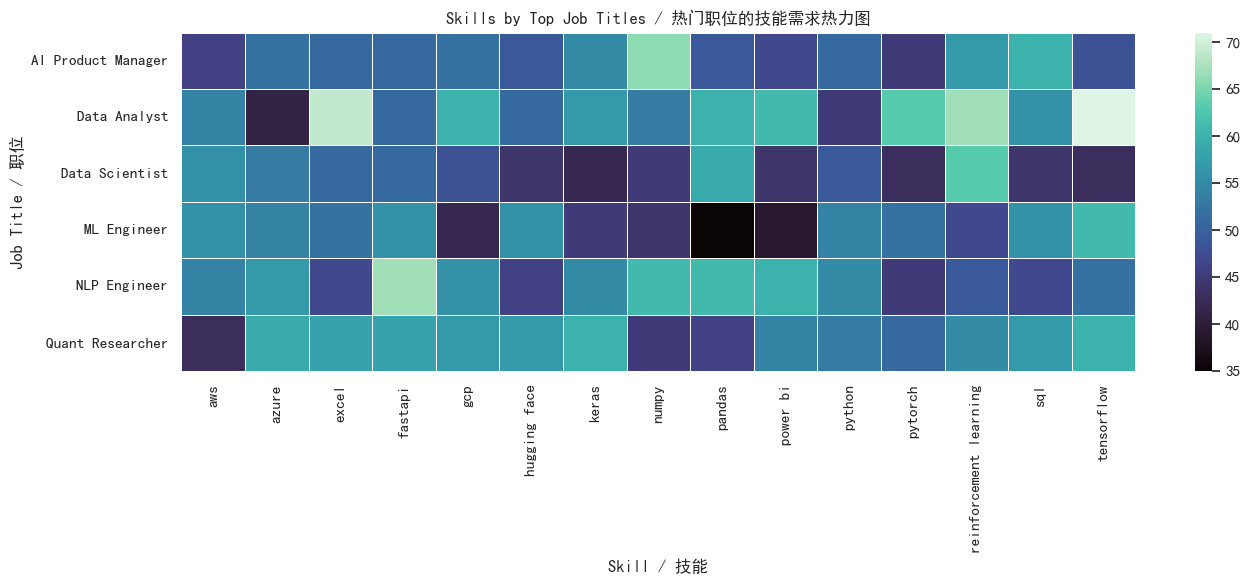

In [8]:
# 7. Skill Demand by Job Title
top_roles = df["job_title"].value_counts().head(6).index
# Count skill occurrences for the selected roles
role_skill = df[df["job_title"].isin(top_roles)].explode("skills_list")
frequent_skills = Counter([s for lst in df["skills_list"] for s in lst]).most_common(15)
top_skills_for_heat = [s for s, _ in frequent_skills]
role_skill = role_skill[role_skill["skills_list"].isin(top_skills_for_heat)]
# Create crosstab matrix
role_skill_mat = pd.crosstab(role_skill["job_title"], role_skill["skills_list"])

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(role_skill_mat, cmap="mako", linewidths=.5, annot=False)
plt.title("Skills by Top Job Titles / 热门职位的技能需求热力图")
plt.xlabel("Skill / 技能")
plt.ylabel("Job Title / 职位")
plt.tight_layout()

plt.savefig("outputs/skills_heatmap_by_role.png", dpi=200, bbox_inches="tight")
print(" Exported: outputs/skills_heatmap_by_role.png")
plt.show()


## 8. Skill Demand by Industry / 按行业技能差异 

We analyze how different industries emphasize different skill sets.

我们分析不同行业在技能需求上的差异。


 Exported: outputs/skills_heatmap_by_industry.png


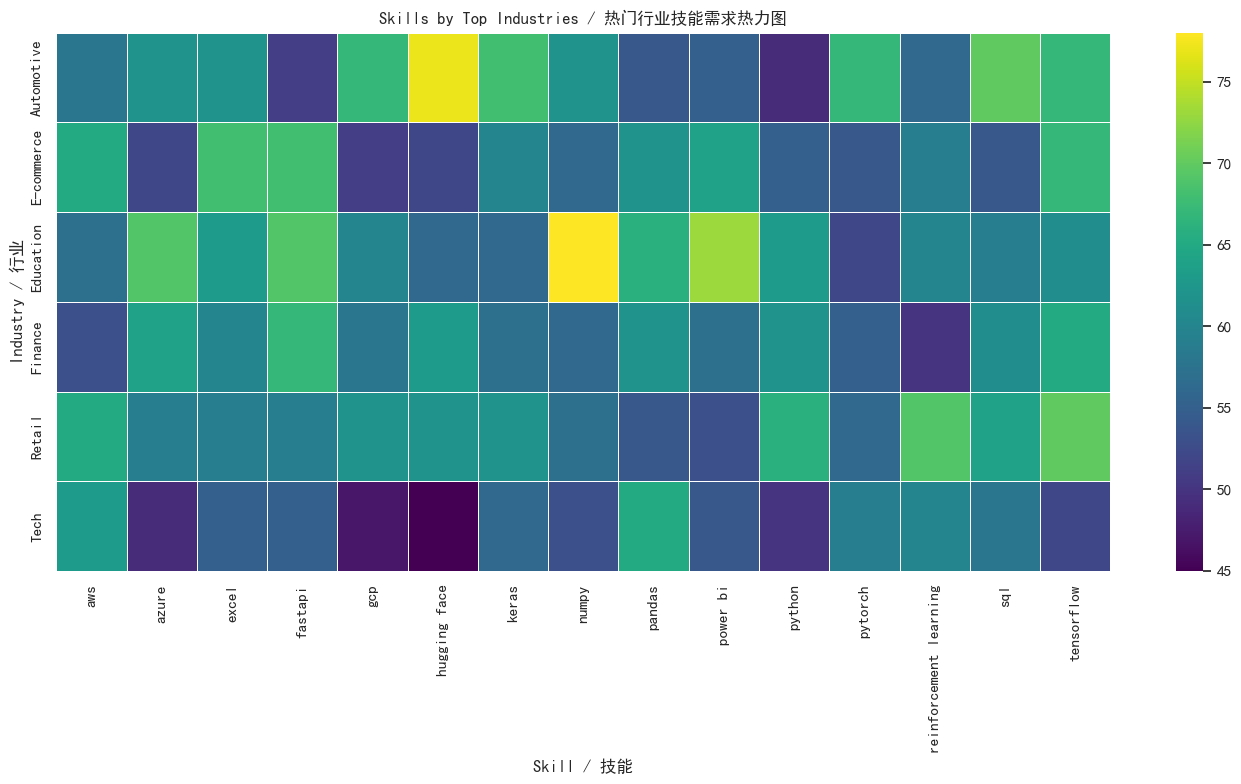

In [9]:
# 8. Skill Demand by Industry
top_inds = df["industry"].value_counts().head(6).index
ind_skill = df[df["industry"].isin(top_inds)].explode("skills_list")
ind_skill = ind_skill[ind_skill["skills_list"].isin(top_skills_for_heat)]
ind_skill_mat = pd.crosstab(ind_skill["industry"], ind_skill["skills_list"])

plt.figure(figsize=(14,8))
sns.heatmap(ind_skill_mat, cmap="viridis", linewidths=.5)
plt.title("Skills by Top Industries / 热门行业技能需求热力图")
plt.xlabel("Skill / 技能"); plt.ylabel("Industry / 行业")
plt.tight_layout()

plt.savefig("outputs/skills_heatmap_by_industry.png", dpi=200, bbox_inches="tight")
print(" Exported: outputs/skills_heatmap_by_industry.png")
plt.show()


## 9. Technical vs Non-Technical Skills /技术与非技术技能占比 
We compare the proportion of technical skills against non-technical skills across job roles.

我们比较不同职位中技术技能与非技术技能占比的差异。

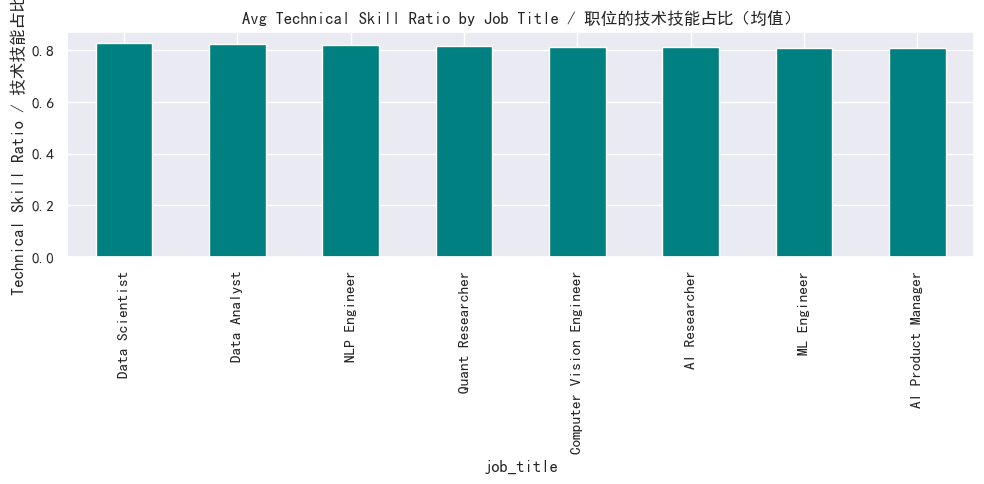

In [10]:
# 9. Technical vs Non-Technical Skills

# Define technical keywords (can be expanded)
technical_keywords = {
    "python","sql","pandas","numpy","scikit-learn",
    "tensorflow","pytorch","keras",
    "mlflow","spark","airflow","aws","azure","gcp",
    "docker","kubernetes","git","linux","c++","java",
    "tableau","power bi","nlp","cv","deep learning",
    "reinforcement learning","fastapi","flask","hugging face"
}

# Define some soft skills (small set for demo)
nontech_keywords = {
    "communication","leadership","presentation",
    "collaboration","problem solving","project management",
    "business"
}


def classify_skills(skills):
    tech = sum(1 for s in skills if s in technical_keywords)
    nontech = sum(1 for s in skills if s in nontech_keywords)
    return pd.Series({"tech_cnt": tech, "nontech_cnt": nontech})

skill_types = df["skills_list"].apply(classify_skills)
df = pd.concat([df, skill_types], axis=1)
df["tech_ratio"] = df["tech_cnt"] / df["num_skills"].replace(0, np.nan)
role_tech_ratio = df.groupby("job_title")["tech_ratio"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
role_tech_ratio.plot(kind="bar", color="teal")
plt.title("Avg Technical Skill Ratio by Job Title / 职位的技术技能占比（均值）")
plt.ylabel("Technical Skill Ratio / 技术技能占比")
plt.tight_layout()
plt.show()


## 10. Skill–Salary / Experience Relationship Analysis 薪资与技能/经验关联分析

We explore how the number of required skills and experience level influence salary levels.
    
我们探索岗位所需技能数量和经验等级如何影响薪资水平。

 Exported: outputs/salary_vs_skills.png


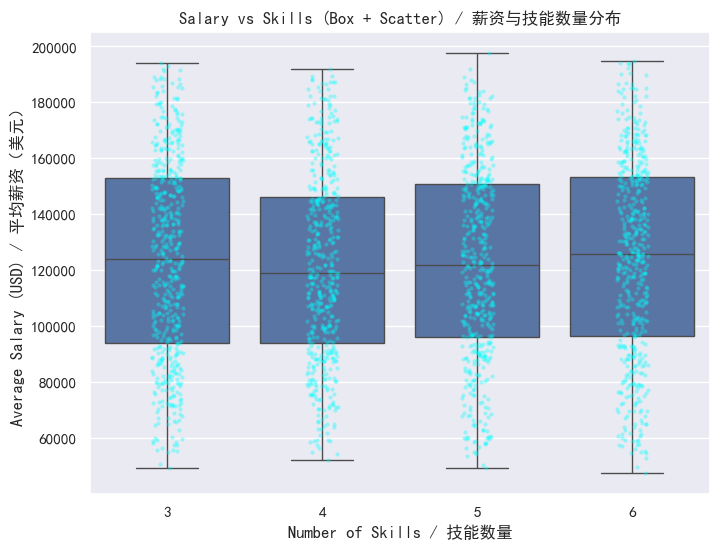

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x="num_skills", y="salary_avg", data=df, showfliers=False)
sns.stripplot(x="num_skills", y="salary_avg", data=df, 
              color="cyan", size=3, alpha=0.35, jitter=True)
plt.title("Salary vs Skills (Box + Scatter) / 薪资与技能数量分布")
plt.xlabel("Number of Skills / 技能数量")
plt.ylabel("Average Salary (USD) / 平均薪资（美元）")

plt.savefig("outputs/salary_vs_skills.png", dpi=200, bbox_inches="tight")
print(" Exported: outputs/salary_vs_skills.png")
plt.show()


###  Insight / 分析结论

- Jobs requiring more skills tend to offer higher salary levels.
- Although the trend is not extremely strong, there is a noticeable positive correlation between skill count and compensation.
- Salary variation also increases as the number of skills grows, suggesting broader opportunities at senior skill levels.

- 所需技能数量越多，岗位薪资普遍越高。
- 虽然趋势不算非常强，但仍呈现正向相关关系。
- 随着技能数量提升，薪资差异范围也扩大，说明对高技能人才的需求更广泛。

## 11. Feature Engineering for Clustering / 聚类特征工程 

We convert skills, salary, and category attributes into numeric features suitable for clustering.

我们将技能、薪资及类别属性转化为可用于聚类的数值特征。


In [12]:
# 11. Feature Engineering for Clustering / 聚类特征工程
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, StandardScaler

num_cols = ["salary_avg", "num_skills"]
num_df = df[num_cols].copy()

# Fill NA with median / 用中位数填充缺失
for col in num_cols:
    num_df[col] = num_df[col].fillna(num_df[col].median())

# Standardize / 标准化数值特征（均值0方差1）
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_df)
num_scaled_df = pd.DataFrame(num_scaled, columns=[f"{c}_scaled" for c in num_cols])

#类别特征处理 Categorical Features
cat_cols = ["job_title", "industry", "employment_type"]
cat_df = df[cat_cols].fillna("unknown")

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_vals = ohe.fit_transform(cat_df)
ohe_cols = ohe.get_feature_names_out(cat_cols)
ohe_df = pd.DataFrame(ohe_vals, columns=ohe_cols)

#技能特征处理 Skills Features 
from collections import Counter
skill_counts = Counter([s for skills in df["skills_list"] for s in skills])
TOP_N = 30  
top_skills = [s for s, _ in skill_counts.most_common(TOP_N)]


filtered_skills = df["skills_list"].apply(
    lambda skills: [s for s in skills if s in top_skills]
)

mlb = MultiLabelBinarizer(classes=top_skills)
skills_hot = mlb.fit_transform(filtered_skills)
skills_df = pd.DataFrame(skills_hot, columns=[f"skill_{s}" for s in top_skills])

features_df = pd.concat([num_scaled_df, ohe_df, skills_df], axis=1)

features_df.head()

,salary_avg_scaled,num_skills_scaled,job_title_AI Product Manager,job_title_AI Researcher,job_title_Computer Vision Engineer,job_title_Data Analyst,job_title_Data Scientist,job_title_ML Engineer,job_title_NLP Engineer,job_title_Quant Researcher,...,skill_power bi,skill_python,skill_pytorch,skill_langchain,skill_scikit-learn,skill_flask,skill_cuda,skill_r,skill_c++,skill_mlflow
0,-0.627339,1.341388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
1,-0.326195,-0.434109,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
2,1.375135,1.341388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
3,-1.027238,1.341388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,1,1,0
4,-0.172187,-0.434109,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


##  Summary (Member 2 Completed) / 总结（成员2完成 ）

We have successfully completed all responsibilities of Member 2,
including in-depth skill analysis and construction of a clustering-ready feature matrix.

我们已成功完成成员2的全部任务，
包括深入技能结构分析与可直接用于聚类分析的特征矩阵构建。

---

###  Key Work Done by Member 2 / 成员2核心工作内容

 Skill & tool normalization (semantic unification)  
技能与工具同义词归一化处理  

 Popular skills & tools statistics and visualization  
热门技能与工具统计及可视化分析  

 Role-/Industry-based skill difference analysis (heatmaps)  
基于职位与行业的技能差异热力图分析  

 Technical vs Non-Technical skill ratio analysis  
技术/非技术技能结构差异分析  

 Salary correlations with skills
薪资与技能数量相关性分析  

 One-Hot encoding for categorical fields  
分类字段 One-Hot 编码处理  

 Standardization of key numerical features  
数值字段标准化处理（如平均薪资等）  

 Final clustering feature dataset exported for Member 3  
导出最终聚类输入特征矩阵供成员3继续使用  

---

###  Output Files Delivered / 输出成果文件

| File / 文件名 | Description / 描述 |
|---|---|
| `cluster_features.csv` |  Features for clustering （聚类输入特征矩阵） |
| `top20_skills.csv` / `top20_tools.csv` | Top skill & tool frequency （技能/工具热度排名） |
| `skills_heatmap_by_role.png` | Skill preference by job role （不同职位技能差异热力图） |
| `skills_heatmap_by_industry.png` | Skill preference by industry （不同行业技能差异热力图） |
| Other charts (salary trends, distributions...) | 其他关键可视化图表 |

---
